# Custom Graphics and Labels
***Kozo Nishida, Kristina Hanspers, Alexander Pico, Barry Demchak***

**Package**

py4cytoscape 0.0.9

This notebook illustrates how Cytoscape’s Custom Graphics can be used to add graphs, charts and other graphics to node, and how to combine Custom Graphics with the enhancedGraphics app for specialized visualizations.

## Prerequisites
In addition to this package (py4cytoscape), you will need:

- Cytoscape 3.8 or greater, which can be downloaded from https://cytoscape.org/download.html. Simply follow the installation instructions on screen.
- Complete installation wizard
- Launch Cytoscape

## Setup required only in a remote notebook environment
If you are using a remote notebook environment such as Google Colab, please execute the cell below.
(If you're running on your local notebook, you don't need to do that.)

In [ ]:
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

## Open Sample
For this tutorial, we will be using the galFiltered sample session file, which includes a yeast network and associated data.

In [1]:
import py4cytoscape as p4c

p4c.open_session()

Opening sampleData/sessions/Yeast Perturbation.cys...


{}

### Set style and node color
First, lets change the style to a simple default and the color of nodes to grey:

In [2]:
p4c.set_visual_style('default')
p4c.set_node_color_default('#D8D8D8')

style_name not specified, so updating "default" style.


''

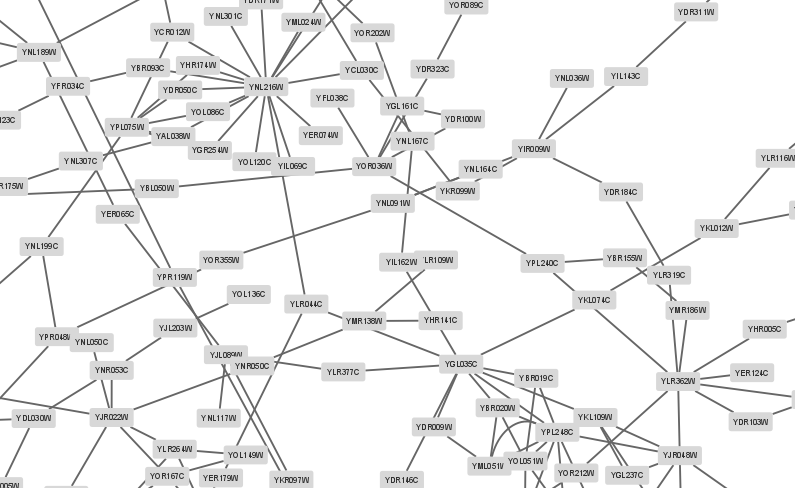

In [3]:
from IPython import display
def show_image_in_notebook(filename):
    p4c.export_image(filename)
    p4c.sandbox_get_from(filename)
    return display.Image(filename)

show_image_in_notebook("img1.png")

## Custom Graphics
### Bar chart

In this example, we will create a bar chart with the three expression values, gal1RGexp, gal4RGexp and gal80Rexp, available as attributes in the session file.

Create the Custom Graphic:

In [4]:
p4c.set_node_custom_bar_chart(["gal1RGexp","gal4RGexp","gal80Rexp"])

style_name not specified, so updating "default" style.


''

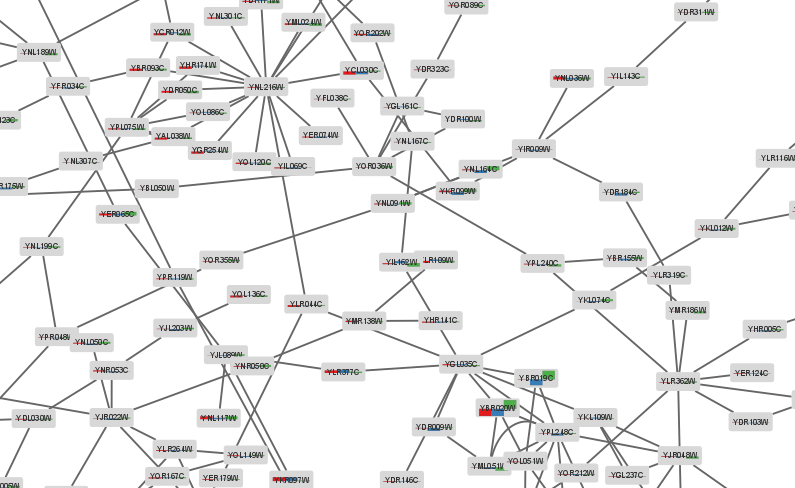

In [5]:
show_image_in_notebook("img2.png")

There are 4 types of Bar Charts and customizable parameters for colors, size, spacing and orientation.

Position the Bar Chart just below the node. This is an optional step that we are doing here just to make room for subsequent graphics. By specifying both anchors at opposite ends, we can get a lot of space between the node and the graphic.

In [6]:
p4c.set_node_custom_position(node_anchor="S", graphic_anchor="N")

style_name not specified, so updating "default" style.


''

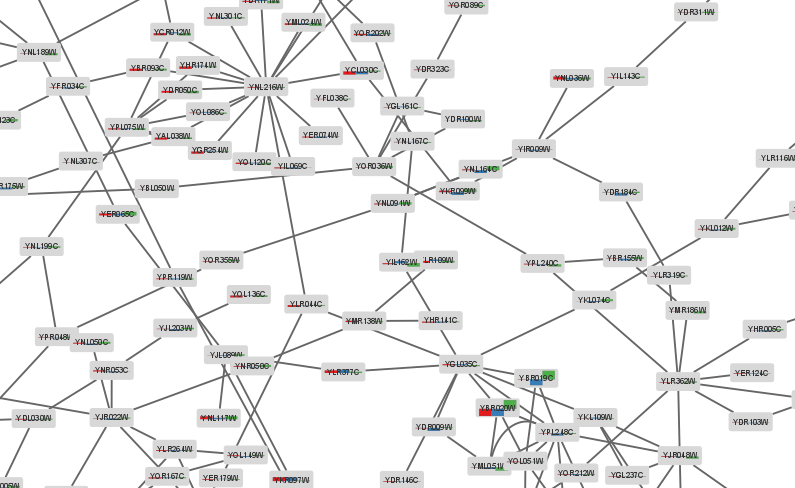

In [7]:
show_image_in_notebook("img3.png")

### Stripes
Next we are going to create stripes of gradient mappings using a horizontal “heatmap”" of the same three data columns and position the heatmap right above the node. For this vignette, we need to also specify the slot number to avoid overwriting the Bar Chart:

In [8]:
p4c.set_node_custom_heat_map_chart(["gal1RGexp","gal4RGexp","gal80Rexp"], slot=2)
p4c.set_node_custom_position(node_anchor="N", graphic_anchor="S", slot=2)

style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.


''

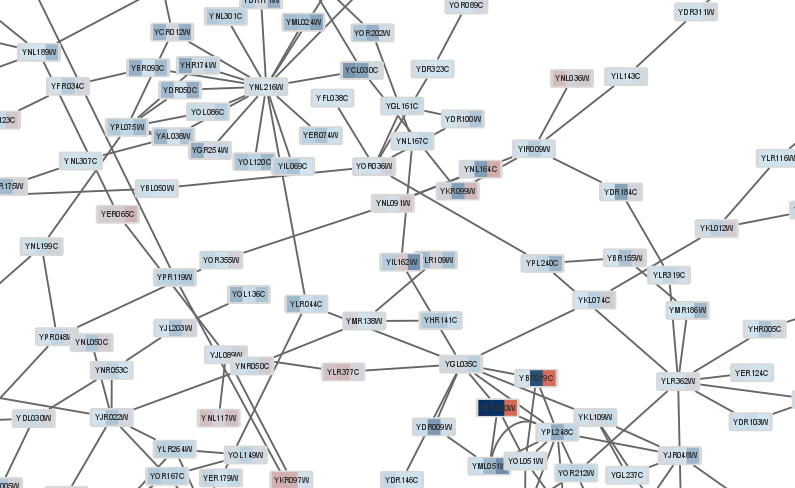

In [9]:
show_image_in_notebook("img4.png")

### Pie chart
Finally, we will create a pie chart with two columns, Radiality and Degree, and place it to the left of the node. Here we’ll use the *xOffset* parameter to be even more specific about where we want to place the graphic relative to the node.

In [10]:
p4c.set_node_custom_pie_chart(["Radiality", "Degree"], slot=3)
p4c.set_node_custom_position(node_anchor="W", x_offset=-20, slot=3)

style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.


''

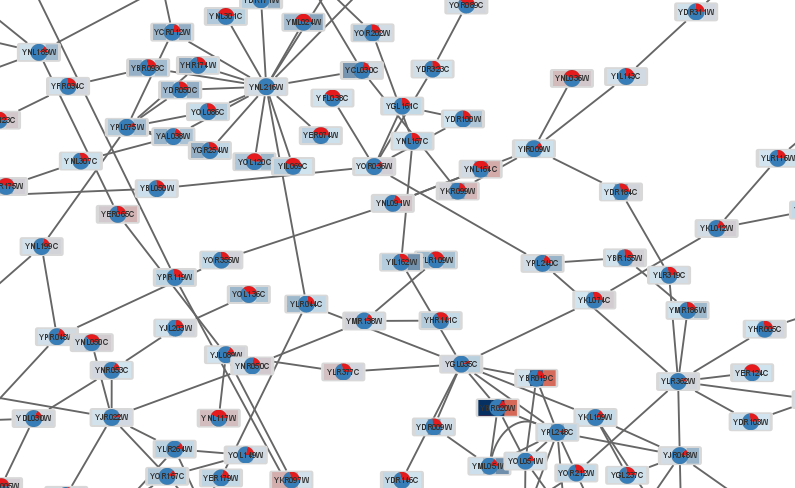

In [11]:
show_image_in_notebook("img5.png")

## Enhanced Graphics
The nodes in the network are labeled with the corresponding protein names (yeast), but there is additional text information in the Node Table that could be useful to display as labels on the nodes. We are going to use the enhancedGraphics app to create a second node label for the common yeast gene name.

This involves a new step: Filling a new column with parameters for the enhancedGraphics App. This column is then mapped to a Custom Graphic slot and (optionally) positioned, like in the examples above.

### Install enhancedGraphics
The enhancedGraphics app is available from the [Cytoscape App Store](http://apps.cytoscape.org/apps/enhancedgraphics). In Cytoscape 3.8 and above, you can install apps from R with the following function:

In [12]:
p4c.install_app("enhancedGraphics")

{}


{}

### Define new label
The new column values have to follow a specific syntax to be recognized by the enhancedGraphics app. Here, for example, is how you set a **label** based on another attribute (e.g., the column called “COMMON”), specifying its size, color, outline and background:

```
"label: attribute=COMMON labelsize=10 color=red outline=false background=false""
```

*For more details on the enhancedGraphics format, [see the manual](http://www.cgl.ucsf.edu/cytoscape/utilities3/enhancedcg.shtml).*

First, we define a dataframe with two columns: node names (“name”) and the new label (“my second label”):

In [13]:
import pandas as pd
all_nodes = p4c.get_all_nodes()

In [14]:
label_df = pd.DataFrame([all_nodes, ["label: attribute=COMMON labelsize=10 color=red outline=false background=false"] * len(all_nodes)]).transpose()

In [15]:
label_df.columns = ["name","my second label"]

In [16]:
label_df

,name,my second label
0,YDL194W,label: attribute=COMMON labelsize=10 color=red...
1,YDR277C,label: attribute=COMMON labelsize=10 color=red...
2,YBR043C,label: attribute=COMMON labelsize=10 color=red...
3,YPR145W,label: attribute=COMMON labelsize=10 color=red...
4,YER054C,label: attribute=COMMON labelsize=10 color=red...
...,...,...
325,YOR204W,label: attribute=COMMON labelsize=10 color=red...
326,YGL097W,label: attribute=COMMON labelsize=10 color=red...
327,YGR218W,label: attribute=COMMON labelsize=10 color=red...
328,YGL122C,label: attribute=COMMON labelsize=10 color=red...


In [17]:
p4c.get_table_columns()

,SUID,shared name,name,selected,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,...,TopologicalCoefficient,degree.layout,COMMON,gal1RGexp,gal4RGexp,gal80Rexp,gal1RGsig,gal4RGsig,gal80Rsig,isExcludedFromPaths
61,61,YDL194W,YDL194W,False,13.116935,0.0,0.076237,0.0,1,26,...,0.0,1,SNF3,0.139,0.333,0.449,0.018043,0.033961,0.011348,False
62,62,YDR277C,YDR277C,False,12.120968,0.008065,0.082502,0.0,2,25,...,0.5,2,MTH1,0.243,0.192,0.448,0.000022,0.028044,0.000573,False
63,63,YBR043C,YBR043C,False,1.5,0.0,0.666667,0.0,1,2,...,0.0,1,YBR043C,0.454,0.023,0.0,0.0,0.94178,0.999999,False
64,64,YPR145W,YPR145W,False,9.798387,0.0,0.102058,0.0,1,18,...,0.0,1,ASN1,-0.195,-0.614,-0.232,0.000032,0.0,0.001187,False
65,65,YER054C,YER054C,False,8.818548,0.044273,0.113397,0.0,2,19,...,0.583333,2,GIP2,0.057,0.206,0.247,0.16958,0.00062,0.00436,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,YOR204W,YOR204W,False,1.666667,0.0,0.6,0.0,1,2,...,0.0,1,DED1,-0.033,-0.056,-0.91,0.39944,0.31268,0.0,False
387,387,YGL097W,YGL097W,False,1.0,1.0,1.0,0.0,3,1,...,0.0,3,SRM1,0.16,-0.23,0.008,0.002191,0.002246,0.93826,False
388,388,YGR218W,YGR218W,False,1.666667,0.0,0.6,0.0,1,2,...,0.0,1,CRM1,-0.018,-0.001,-0.018,0.61381,0.9794,0.80969,False
389,389,YGL122C,YGL122C,False,14.375,0.024063,0.069565,0.0,3,25,...,0.333333,3,NAB2,0.174,0.02,0.187,0.000873,0.61707,0.005997,False


Next, we load this dataframe into the Node Table to create and fill a new column:

In [18]:
p4c.load_table_data(label_df, data_key_column="name", table_key_column="name")

'Success: Data loaded in defaultnode table'

In [19]:
p4c.get_table_columns()

,SUID,shared name,name,selected,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,...,degree.layout,COMMON,gal1RGexp,gal4RGexp,gal80Rexp,gal1RGsig,gal4RGsig,gal80Rsig,isExcludedFromPaths,my second label
61,61,YDL194W,YDL194W,False,13.116935,0.0,0.076237,0.0,1,26,...,1,SNF3,0.139,0.333,0.449,0.018043,0.033961,0.011348,False,label: attribute=COMMON labelsize=10 color=red...
62,62,YDR277C,YDR277C,False,12.120968,0.008065,0.082502,0.0,2,25,...,2,MTH1,0.243,0.192,0.448,0.000022,0.028044,0.000573,False,label: attribute=COMMON labelsize=10 color=red...
63,63,YBR043C,YBR043C,False,1.5,0.0,0.666667,0.0,1,2,...,1,YBR043C,0.454,0.023,0.0,0.0,0.94178,0.999999,False,label: attribute=COMMON labelsize=10 color=red...
64,64,YPR145W,YPR145W,False,9.798387,0.0,0.102058,0.0,1,18,...,1,ASN1,-0.195,-0.614,-0.232,0.000032,0.0,0.001187,False,label: attribute=COMMON labelsize=10 color=red...
65,65,YER054C,YER054C,False,8.818548,0.044273,0.113397,0.0,2,19,...,2,GIP2,0.057,0.206,0.247,0.16958,0.00062,0.00436,False,label: attribute=COMMON labelsize=10 color=red...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,YOR204W,YOR204W,False,1.666667,0.0,0.6,0.0,1,2,...,1,DED1,-0.033,-0.056,-0.91,0.39944,0.31268,0.0,False,label: attribute=COMMON labelsize=10 color=red...
387,387,YGL097W,YGL097W,False,1.0,1.0,1.0,0.0,3,1,...,3,SRM1,0.16,-0.23,0.008,0.002191,0.002246,0.93826,False,label: attribute=COMMON labelsize=10 color=red...
388,388,YGR218W,YGR218W,False,1.666667,0.0,0.6,0.0,1,2,...,1,CRM1,-0.018,-0.001,-0.018,0.61381,0.9794,0.80969,False,label: attribute=COMMON labelsize=10 color=red...
389,389,YGL122C,YGL122C,False,14.375,0.024063,0.069565,0.0,3,25,...,3,NAB2,0.174,0.02,0.187,0.000873,0.61707,0.005997,False,label: attribute=COMMON labelsize=10 color=red...


### Map and position label
We now have a new column, *my second label*, that we can use for the mapping. This mapping does not come with a custom helper function, se we are going to use two alternative functions to prepare the passthrough mapping property and then update our visual style with the new mapping:

In [20]:
label_map = p4c.map_visual_property('node customgraphics 4', 'my second label', 'p')
p4c.update_style_mapping('default', label_map)

''

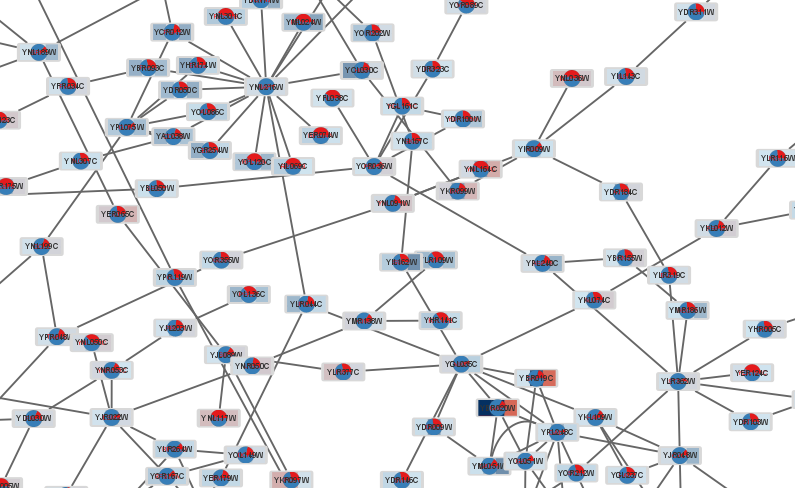

In [21]:
show_image_in_notebook("img6.png")

*Note: the custom graphic slot number is actulally part of the property’s name.*

Finally, we position the new label in the upper right corner:

In [22]:
p4c.set_node_custom_position(node_anchor="E", graphic_anchor="C", x_offset=10, slot=4)

style_name not specified, so updating "default" style.


''

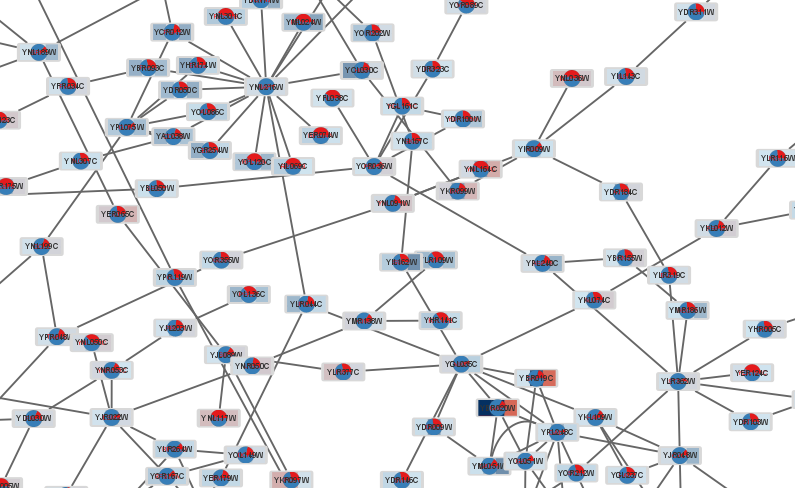

In [23]:
show_image_in_notebook("img7.png")